# COMP4328/5328/8328 - Advanced Machine Learning

## Tutorial 3 - Convex Optimization

**Semester 2, 2025**

**Objectives:**

* To implement the linear regression.
* To implement the linear logistic regression.

**Instructions:**
* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "lab1.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "lab1.ipynb" file
* Complete exercises in "tutorial1_2.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.

Lecturers: Tongliang Liu

## 1. Linear Regression

* The topic is assumed known (COMP5318). More details can be found at Wiki: https://en.wikipedia.org/wiki/Linear_regression.

**Advertising Example:**
* Let $X$ and $Y$ be the variables of TV advertising budget and product sales, respectively. $\{(x_1,y_1),\cdots,(x_n,y_n)\}$ be $n$ observation pairs.
* Our target is to estimate a function $f$ such that $f(X)$ can predict the sale $Y$ well.
* The most common approach involves minimizing the least squares criterion.

### 1.1 Load Advertising Data

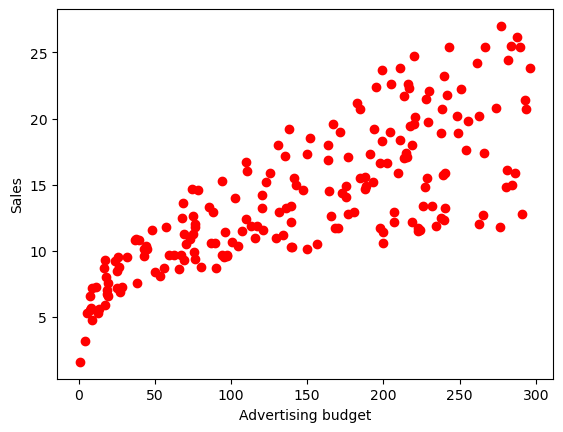

In [2]:
# Note that: csv is a library for reading and writing csv files
# matplotlib is a Python 2D plotting library, which can be easily installed by "pip install matplotlib".
import csv
import matplotlib.pyplot as plt
import pandas as pd
from numpy.ma.core import minimum

# load data in csv file
budget = []
sales = []
with open('./data/Advertising.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        budget.append(row[1])
        sales.append(row[-1])

# The data starts from index 1
budget = budget[1:]
sales = sales[1:]

# Convert strings to float values
budget = [float(item) for item in budget]
sales = [float(item) for item in sales]

# Visualize the data
plt.plot(budget,sales,'ro')
plt.xlabel('Advertising budget')
plt.ylabel('Sales')
plt.show()

In [3]:
df_ad = pd.read_csv('./data/Advertising.csv')
df_ad

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### 1.2 Linear Regression Model

* If we roughly assume that $f(x)= \beta_0 x + \beta_1$, then our goal is to estimate the coefficients $\beta_0$ and $\beta_1$. Here, the model is linear with respect to the coefficients $\beta_0$ and $\beta_1$.
* Let $\hat{y}_i = \beta_0 x_i + \beta_1$ be the prediction of feature $x_i$, and $e_i = y_i - \hat{y}_i$ represent the difference between the $i$-th observation response value and the response value predicted by our linear model.
* Then, we can estimate the coefficients by minimizing the residual sum of squares (RSS): $RSS = e_1^2 + e_2^2 + \cdots + e_n^2$, or equivalently as,$RSS = (y_1-\beta_0 x_1-\beta_1)^2 + \cdots + (y_n-\beta_0 x_n-\beta_1)^2$.
* It is easy to derive that the minimizers are $\hat{\beta}_0 = \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}$ and $\hat{\beta}_1=\bar{y}-\hat{\beta}_0\bar{x}$, where $\bar{x}=\frac{1}{n}\sum_{i=1}^n x_i$ and $\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i$.

**Exercise 1.2.1** (Derivations of above minimizers)

* Hints: This can be done by setting the gradients to 0. We can obtain 2 gradient equations:
* $\frac{\partial RSS}{\partial \beta_0} = -2\sum_{i=1}^n (y_i-\beta_0 x_i - \beta_1)x_i = 0$.
* $\frac{\partial RSS}{\partial \beta_1} = -2\sum_{i=1}^n (y_i-\beta_0 x_i - \beta_1) = 0$.
* Solving above equations, we can get the results. 
* Note that all least square problem can have similar gradient equations.

**Exercise 1.2.2** (Coefficient Estimation of Advertising Examples)
* To estimate the coefficients for the advertising data in above linear model.
* The final result is $\beta_0 = 0.0475$ and $\beta_1=7.03$.

In [4]:
# TODO
import numpy as np
# beta_0, beta_1 = 0.0475, 7.03
# beta_0:
x = np.array(budget, dtype=float)
y = np.array(sales, dtype=float)
xbar = x.mean()
ybar = y.mean()

Sxx = np.sum((x - xbar) ** 2)
Sxy = np.sum((x - xbar) * (y - ybar))

beta_0 = Sxy / Sxx
beta_1 = ybar - beta_0 * xbar

g0 = -2*np.sum(y - (beta_1 + beta_0*x))
g1 = -2*np.sum((y - (beta_1 + beta_0*x))*x)
g0, g1, beta_1, beta_0

(4.547473508864641e-13,
 5.093170329928398e-11,
 7.0325935491276965,
 0.047536640433019736)

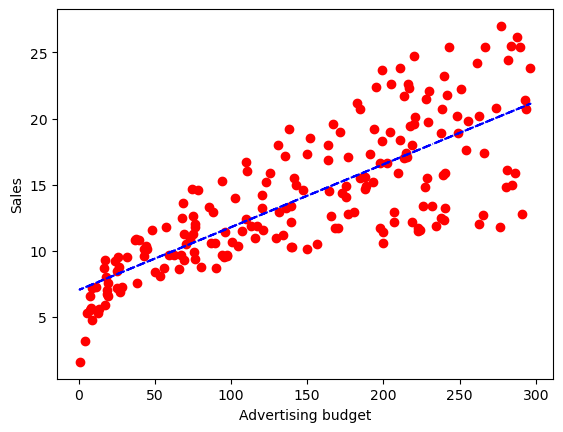

In [5]:
pred_y = [beta_0 * item + beta_1 for item in budget]
# Visualize the data
plt.plot(budget,sales,'ro',budget, pred_y, 'b--')
plt.xlabel('Advertising budget')
plt.ylabel('Sales')
plt.show()

### 1.3 Matrix Form

* Denote $\mathbf{x}$ as a design matrix $\begin{bmatrix}
    x_1       & x_2 & x_3 & \dots & x_n \\
    1       & 1 & 1 & \dots & 1
\end{bmatrix}^{\top}$, $\mathbf{y} = [y_1,\cdots,y_n]^{\top}$, $\mathbf{\beta} = [\beta_0,\beta_1]^{\top}$.
* We have the predictions $\hat{\mathbf{y}} = \mathbf{x} \mathbf{\beta}$.
* Then, $RSS = \|\mathbf{y}-\hat{\mathbf{y}}\|_2^2=\|\mathbf{y}- \mathbf{x}\mathbf{\beta}\|_2^2$, where $\|\cdot\|_2$ is $l_2$ norm of a vector.
* If we assume that $\mathbf{x}^{\top}\mathbf{x}$ is non-singular. The minimizers are $\mathbf{\beta}=(\mathbf{x}^{\top}\mathbf{x})^{-1}\mathbf{x}^{\top}\mathbf{y}$.

**Exercise 1.3.1** (Derivations of the minimizers)
* Similarly, we compute the gradient of $RSS$ with respect to $\mathbf{\beta}$. Then, let the gradient be $\mathbf{0}$.

**Exercise 1.3.2** (Coefficient Estimation of Advertising Examples)
* To estimate the coefficients for the advertising data according to above derivations.
* The final result is also $\mathbf{\beta} = [0.0475,7.03]^{\top}$.

In [6]:
# Numpy can be easily installed by "pip install numpy".
# Hint: numpy.dot, numpy.linalg.inv can be used.
import numpy as np
import numpy.linalg as lng

# store budget and sale values into matrix
n = len(budget)
x = np.ones((n,2))
y = np.zeros((n,1))

for i in range(n):
    x[i][0] = budget[i]
    y[i] = sales[i]
print(x.shape, y.shape)

# compute coefficient beta
# TODO

beta = np.linalg.pinv(x.T @ x) @ (x.T @ y)

# How to calculate the residual
Rss = np.linalg.norm(y - x @ beta) ** 2
beta

(200, 2) (200, 1)


array([[0.04753664],
       [7.03259355]])

### 1.4 Gradient Descent Method
* We can also solve this linear regression problem using gradient descent method.
* In gradient decent method, given an objective function $R(\mathbf{\beta})$, such as RSS in above example, we update $\mathbf{\beta}$ as $\mathbf{\beta}^{(k+1)} = \mathbf{\beta}^{(k)}-\lambda^{(k)}\nabla R(\mathbf{\beta}^{(k)})$. Here, $\lambda^{(k)}$ are the step sizes or learning rates; $\nabla R(\mathbf{\beta}^{(k)})$ is the gradient of $R(\beta)$ at $\mathbf{\beta}^{(k)}$.
* This process will generate a minimizing sequence $\mathbf{\beta}^{(k)}, k=1,2,\cdots$, which satisfy $R(\mathbf{\beta}^{(k+1)}) \leq R(\mathbf{\beta}^{(k)})$. Also, it may finally achieve the optimal minimizer.

**Exercise 1.4.2** (Coefficient Estimation of Advertising Examples)
* To estimate the coefficients for the advertising data using gradient descent method.
* Note that this method can achieve a solution close to above mentioned methods by carefully choosing the learning rate and maximum number of iterations. Using following parameters, the result is $[0.0478, 6.99]^{\top}$.

In [7]:
# initialize beta
beta = np.zeros((2,1))
# learning rate
lr = 1e-7
# max number of iterations
maxiter = 1000000
# difference between betas before and after update
diff = float('Inf')
# stop criterion
eps = 1e-8
iters = 0
while (iters < maxiter) and (diff > eps):
    # compute the gradient of RSS at beta and update beta
    # TODO
    # 计算 残差
    r = y - x @ beta
    grad = -2 * (x.T @ r)

    # 更新beta
    beta_old = beta
    beta = beta - lr * grad

    # 计算最新的残差
    diff = np.linalg.norm(y - x @ beta) ** 2
    iters += 1

RSS = np.linalg.norm(y - x @ beta) ** 2
print(RSS)
beta


2102.5305871022556


array([[0.04753806],
       [7.03231357]])

## 2. Logistic Regression
* Introduction to logistic regression. In above advertising example, we try to regress real values of sales by using linear models. Here, we consider the classification problem in which target variable $Y$ are categorical.
* We also let $X$ and $Y$ be the variables of features and targets (labels), respectively. 
* We are often given observations $\{(x_1,y_1),\cdots,(x_n,y_n)\}$. Our target is to learn a classifer $f$ such that $f(X)$ can predict the label $Y$ very well.

**Iris Example:**
* In this example, we try to classify types of iris plant. The dataset is downloaded from UCI Machine Learning Repository.
* The Iris dataset includes three types of iris plant: Setosa, Versicolour, and Virginica. Each type include 50 examples. 
* Here, we load the data for Setosa and Versicolour, and try to distinguish them by training a binary classfier.

### 2.1 Load Iris Data

In [8]:
# Note that: csv is a library for reading and writing csv files
import csv
import numpy as np

# load data in csv file
features = []
target = []
with open('./data/iris.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        if row[-1]=='setosa':
            features.append([float(i) for i in row[:-1]])
            target.append(1)
        elif row[-1]=='versicolor':
            features.append([float(i) for i in row[:-1]])
            target.append(-1)
        else:
            continue
            
# we convert list to numpy array,then we can use the advantage of the numpy library           
X = np.array(features)
Y = np.array(target)
(n,dim) = X.shape


### 2.2 Logistic Regression Model

* In logistic regression, we let the classifier be $f(x,w) = \log \frac{p(y=1|x,w)}{p(y=-1|x,w)}$. We can see, if $p(y=1|x,w)>p(y=-1|x,w)$, $f(x,w)>0$ and $x$ should be classified to $1$; otherwise, $-1$.
* Then, it is easy to get $p(y|x,w)=\frac{1}{1+\exp(-yf(x,w))}$.
* Given the training data $\{(x_1,y_1),\cdots,(x_n,y_n)\}$, we can identify the classifier by maximize the likelihood, i.e., $ML=\Pi_{i=1}^n p(y_i|x_i,w)=\Pi_{i=1}^n \frac{1}{1+\exp(-y_if(x_i,w))}$; or equivalently, by minimizing the negative log likelihood (NLL), i.e., $NLL=\sum_{i=1}^n \log(1+\exp(-y_if(x_i,w)))$.
* In the iris example, we also assume that $f$ is linear with respect to parameters $w$; that is, $f(x,w)=w^{\top}x$.
* In order to train the classifier, we often use the gradient descent method to minimize NLL.
* This topic is assumed known (COMP5318). More details can be found at Wiki: https://en.wikipedia.org/wiki/Logistic_regression.

**Exercise 2.2.1** (Estimating Parameters of Iris Example)
* To estimate the parameters by using the gradient descent method.
* Note that learning rate and maxiter should be tuned to achieve best results. The linear classifier may not work well.

In [9]:
# shuffle index
arr = np.arange(n)
np.random.shuffle(arr)

# split the data to training (80%) and test data (20%)
ntr = int(0.8*n)
nts = n - ntr

# training data
Xtr = X[arr[:ntr]]
Ytr = Y[arr[:ntr]]

# test data
Xts = X[arr[ntr:]]
Yts = Y[arr[ntr:]]

# Optional: data preprocessing such as normalization
# TODO
# x_min = min(Xtr.min(), Xts.min())
# x_max = max(Xtr.max(), Xts.max())
# Xtr = (Xtr - x_min) / (x_max - x_min)
# Xts = (Xts - x_min) / (x_max - x_min)
mu  = Xtr.mean(axis=0)
std = Xtr.std(axis=0) + 1e-12     # 防止除0
Xtr_scaled = (Xtr - mu) / std
Xts_scaled = (Xts - mu) / std

Xtr = np.column_stack([np.ones((Xtr_scaled.shape[0], 1)), Xtr_scaled])
Xts = np.column_stack([np.ones((Xts_scaled.shape[0], 1)), Xts_scaled])
Ytr = Ytr.reshape(-1, 1)
Yts = Yts.reshape(-1, 1)
Xtr
# initialize parameters dim means how many features it has.

array([[ 1.        , -0.73569193,  1.0766385 , -1.02103305, -1.02348699],
       [ 1.        ,  0.47159739, -0.81404374,  0.70660324,  0.73735084],
       [ 1.        ,  0.47159739, -1.02411955,  0.77570869,  0.73735084],
       [ 1.        , -1.03751426,  0.65648689, -0.88282214, -1.02348699],
       [ 1.        ,  0.32068623, -0.60396794,  1.12123595,  0.91343462],
       [ 1.        , -1.33933659,  0.23633528, -1.02103305, -1.02348699],
       [ 1.        , -0.13204727,  1.70686592, -0.81371669, -0.67131942],
       [ 1.        , -1.49024776, -1.65434697, -1.0901385 , -0.84740321],
       [ 1.        , -0.73569193,  0.65648689, -0.88282214, -0.67131942],
       [ 1.        , -0.58478077, -1.23419535,  0.08465418,  0.56126706],
       [ 1.        ,  1.22615322, -1.23419535,  1.39765776,  1.26560219],
       [ 1.        ,  2.28253137,  0.23633528,  1.25944686,  1.08951841],
       [ 1.        ,  0.77341972,  0.65648689,  1.12123595,  1.44168597],
       [ 1.        ,  0.92433089, -0.6

In [36]:

w = np.random.random((dim + 1, 1))

# learning rate
lr = 1e-3

# maximum iterations
maxiter = 500

# difference between betas before and after update. If the difference is small enough, then stop the update.
diff = float('Inf')
iters = 0
# stop criterion
eps = 1e-10
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

while (iters < maxiter) and (diff > eps):
    # compute gradient of NLL at w and update w
    y_pred = sigmoid(Xtr @ w)
    grad = Xtr.T @ (y_pred - Ytr)

    w_old = w.copy()
    # upgrade the Weight
    w = w - lr * grad

    # calculate the difference
    diff = np.linalg.norm(w - w_old)
    iters += 1

# test accuracy on test set
# TODO
# 训练集
res = Xts @ w               # 线性打分 (logit)
# convert res to 1, -1, using sigmod
yhat = np.where(sigmoid(res) >= 0.5, 1, -1)  # sign(res)
acc  = (yhat == Yts).mean()
yhat

array([[-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1]])

In [14]:
Yts

array([[-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1]])

In [37]:
acc

1.0